In [18]:
from numpy import average, linspace, sqrt
from scipy.stats import norm as normal, t
from seaborn import lineplot
from scipy.special import erfinv

In [19]:
#################### inputs ####################
mu = 1  # location 
sigma2 = 0.3  # dispersione
nu = 4  # gradi di libertà
################################################### 

In [20]:
#################### Gaussiana ####################

# media
e_y = normal.stats(mu,sigma2,'m')
# varianza
v_y = normal.stats(mu,sigma2,'v')
# simmetira
sk_y = normal.stats(mu,sigma2,'s')
               
########## input ##########
alpha = 0.05  # threshold
###############################################

q_y = e_y + sqrt(v_y)*sqrt(2)*erfinv(2*alpha - 1)  # VaR
q_y_cornishfisher = e_y + sqrt(v_y)*normal.ppf(alpha)  # Cornish-Fisher VaR
print('q_y_cornishfisher =', q_y_cornishfisher.round(2))
print('q_y =', q_y.round(2))

q_y = 0.51


In [22]:
#################### t-student ####################

# media
e_y = t.stats(nu,mu,sigma2,'m')
# varianza
v_y = t.stats(nu,mu,sigma2,'v')
# simmetira
sk_y = t.stats(nu,mu,sigma2,'s')

########## statistiche ##########
print('e_y =', e_y)
print('v_y =', v_y)
print('sk_y =', sk_y)
############# inputs ##############
conf_lev = 0.95  # livelllo di confidenza 
alpha = 1 - conf_lev 
###################################

# Cornish-Fisher 
q_cf =  e_y + sqrt(v_y)*t.ppf(alpha,nu,mu,sigma2) 

########### result ###########
print('q_cf =', q_cf.round(2))

e_y = 1.0
v_y = 0.18
sk_y = 0.0
q_cf = 1.15


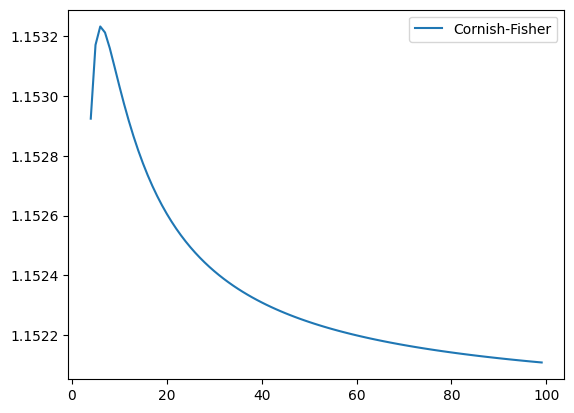

In [23]:
################# input #################
nu_max = 100  # massimo gradi di libertà 
#########################################

# gradi di libertà
nu_grid = range(4,nu_max)

# Cornish-Fisher con gradi di libertà incrementali
q_y_alpha_cf = [] 
for i in range(4,nu_max):
    cf = e_y + sqrt(v_y)*t.ppf(alpha,i,mu,sigma2)
    q_y_alpha_cf.append(cf)

lineplot(x=nu_grid, y=q_y_alpha_cf, label='Cornish-Fisher');